# **Práctica 5 - Algoritmos de Búsqueda Parte 2.**

## **Nodos**

In [12]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, strName, strValue, strNode):
        self.name = strName
        self.value = strValue
        self.next = strNode

    def __repr__(self):
        return f"{self.name} -> {self.value}"

def new_arr(type, size, start):
    nombres = ["alejandro","maria","jose","lucia","carlos","ana","miguel","laura","javier","paula","andres","sofia","david","elena","fernando","isabel","diego","patricia","sergio","claudia","raul","beatriz","manuel","teresa","antonio","marta","pedro","natalia","francisco","rocio","ricardo","veronica","alberto","lorena","eduardo","gabriela","roberto","daniela","hugo","carmen","ivan","julia","adrian","cristina","mario","susana","oscar","alejandra","enrique","valeria"]
    arr = []
    i = 0
    while i < size:
        if type == "ordened": value = start + i
        if type == "reverse": value = start - i
        if type == "only": value = start
        if type == "random": value = random.randint(start, start + size)
        if type == "string": value = nombres[random.randint(0, len(nombres) - 1)]
        i += 1
        arr.append(Node("Nodo " + str(i), value, None))
    return arr

## **Función Hash**

In [13]:
def hashMod(key, size):
    time = 0
    space = 0
    if isinstance(key, str):
        add = 0
        i = 0
        space += 1
        while i < len(key):
            time += 1
            add += ord(key[i])
            i += 1
        return add % size, time, space
    else:
        time += 1
        space += 1
        return int(key) % size, time, space

## **Algoritmos**

### **Reasignación Lineal**

In [14]:
def insert_rea(table, node):
    collisions = 0
    time = 1
    space = 1
    i, time_hash, space_hash = hashMod(node.value, len(table))
    time += time_hash
    space += space_hash
    st_pos = i
    if table[i] is not None:
        collisions = 1
    while table[i] is not None:
        time += 1
        i = (i + 1) % len(table)
        if i == st_pos:
            print("Error: La tabla hash está llena.")
            return collisions, time, space
    table[i] = node
    return collisions, time, space

def search_rea(table, key):
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(key, len(table))
    time += time_hash
    space += space_hash
    st_pos = i
    space += 1
    while table[i] is not None:
        time += 1
        if table[i].value == key:
            return table[i], time, space
        i = (i + 1) % len(table)
        if i == st_pos:
            return None, time, space
    return None, time, space

#### **Prueba Reasignación Lineal**

In [15]:
MAX = 10
table = [None] * MAX
arr = new_arr("string", len(table), 0) # tipo de arreglo, tamaño, inicio


i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_rea(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1
    
key = "alejandro" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_rea(table, key)
if result is not None: print("El valor", key, "se encontro en el", result.name)
else: print("El valor", key, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor alejandro no se encontro
Hubo 5 colisiones


### **Mejor Caso (Función Hash c/Reasignación Lineal)**

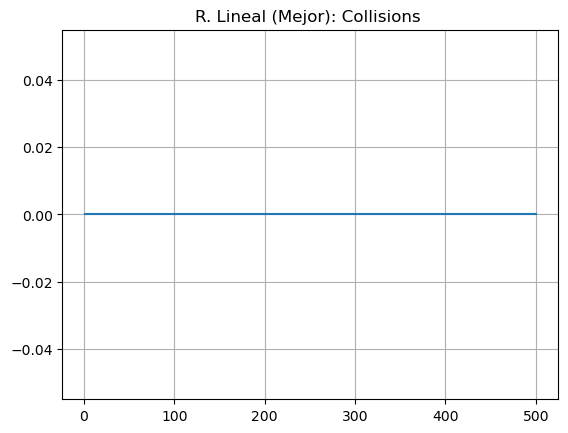

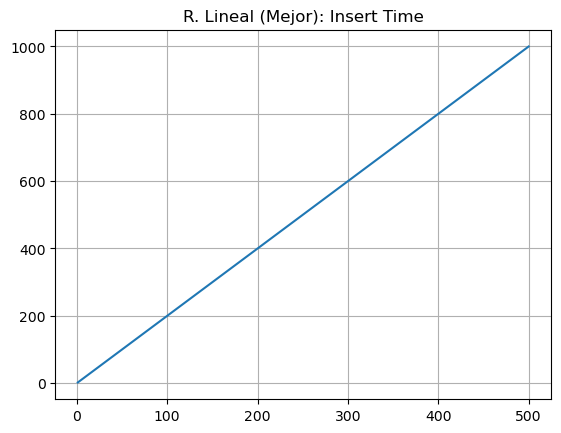

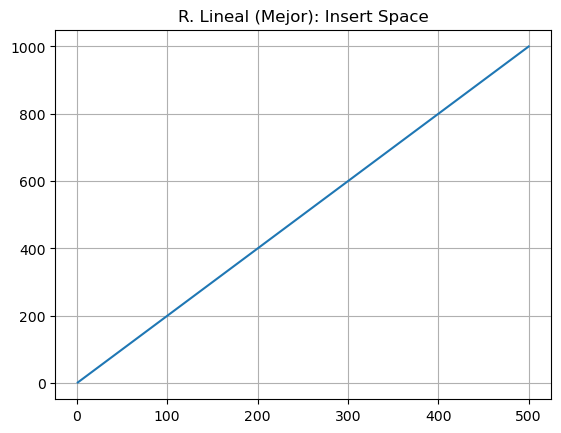

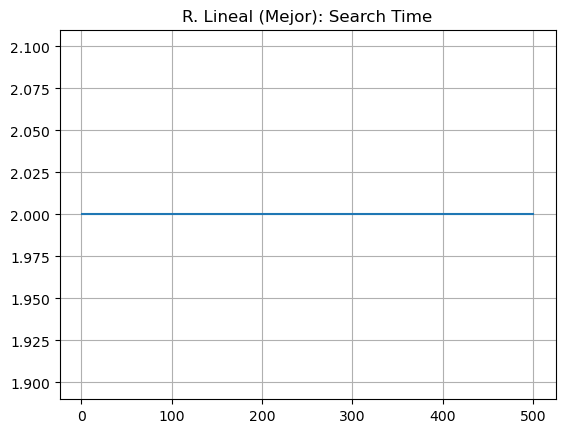

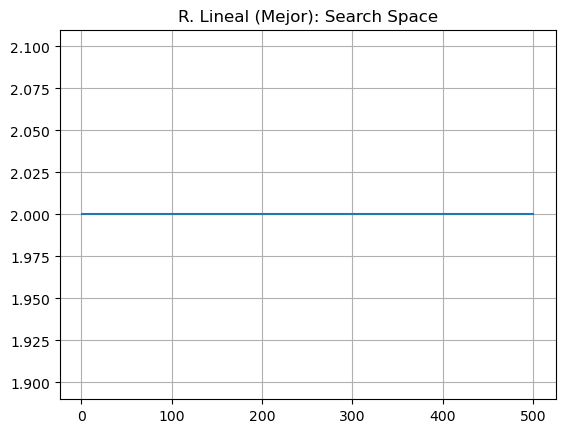

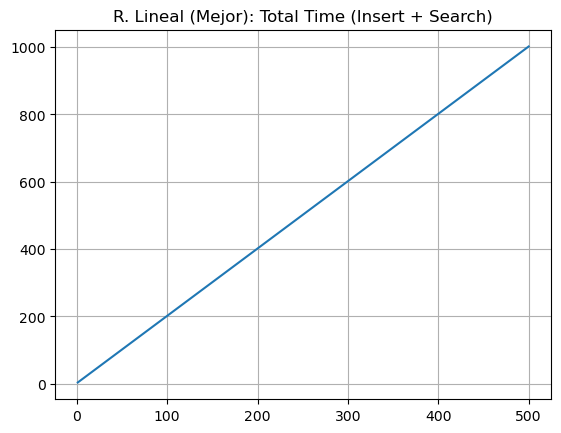

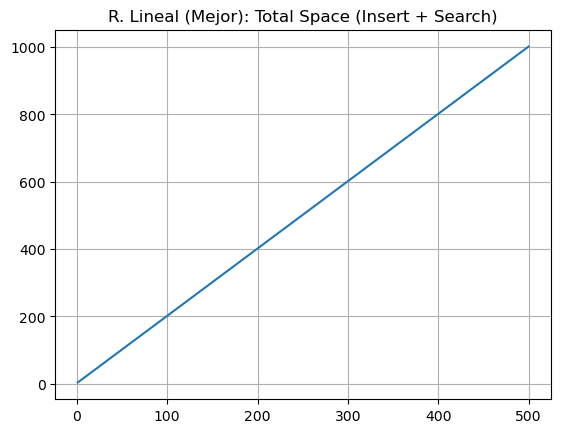

In [16]:
MAX = 500
arr = new_arr("ordened", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_rea(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Mejor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Mejor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Mejor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Mejor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Mejor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Mejor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Mejor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()
    
y_coll_mejor = y_collisions
y_time_in_mejor = y_time_insert
y_space_in_mejor = y_space_insert
y_time_se_mejor = y_time_search
y_space_se_mejor = y_space_search
y_time_mejor = y_time
y_space_mejor = y_space

### **Peor Caso (Función Hash c/Reasignación Lineal)**

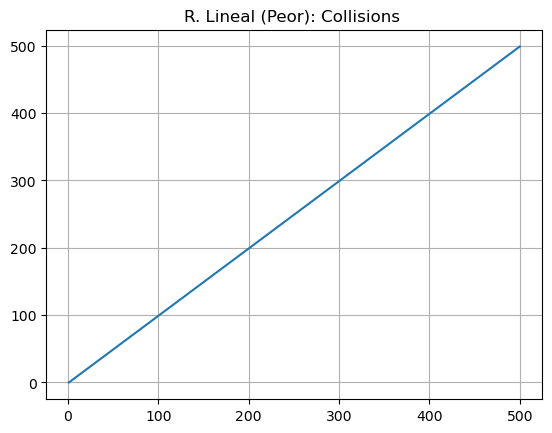

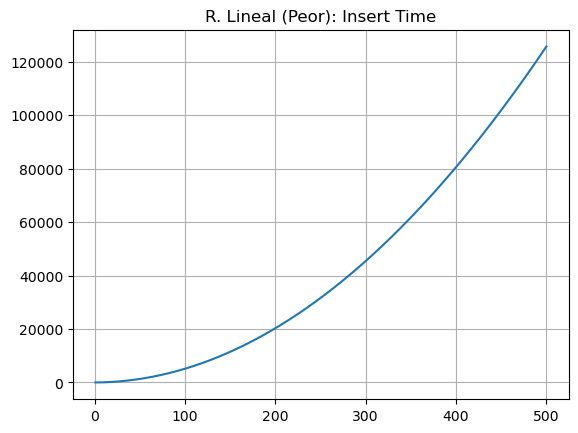

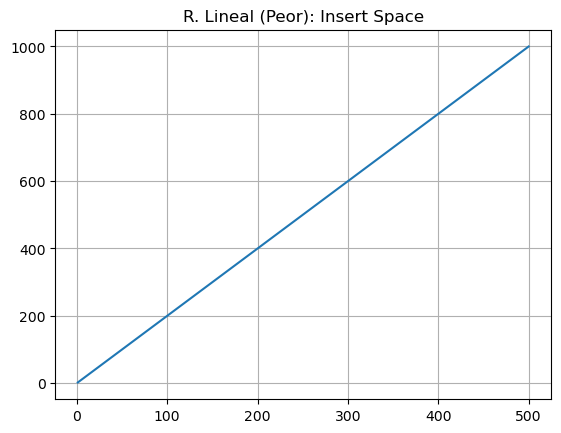

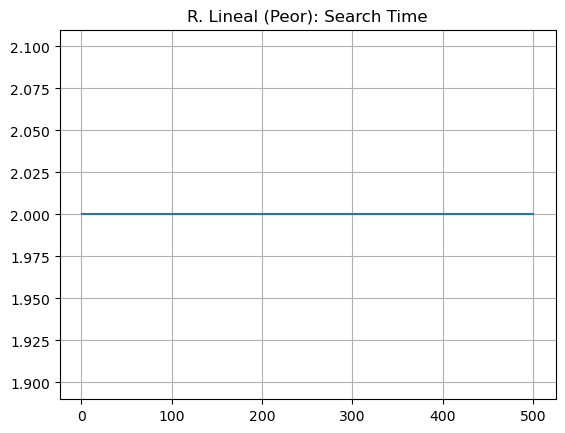

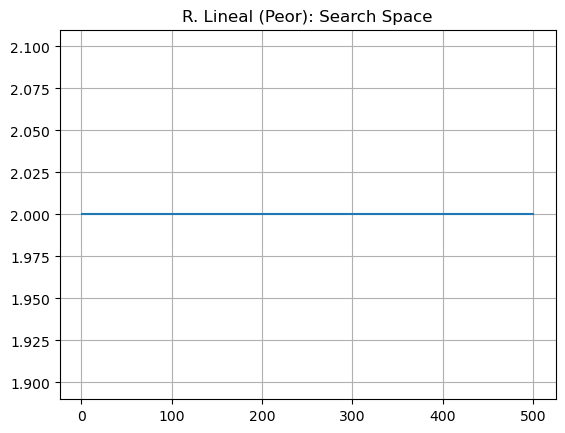

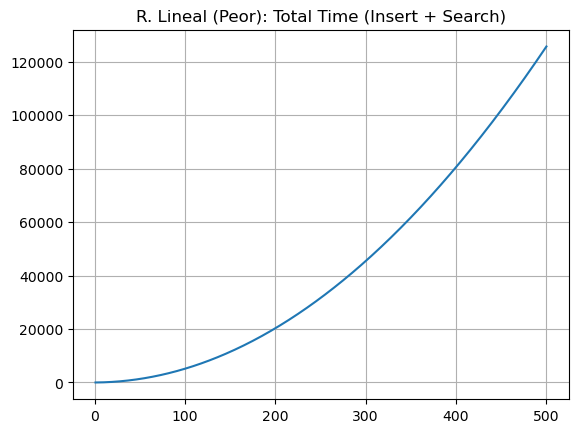

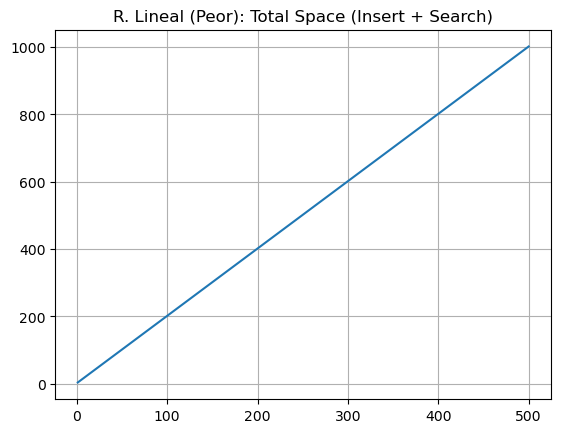

In [17]:
MAX = 500
arr = new_arr("only", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_rea(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_peor = y_collisions
y_time_in_peor = y_time_insert
y_space_in_peor = y_space_insert
y_time_se_peor = y_time_search
y_space_se_peor = y_space_search
y_time_peor = y_time
y_space_peor = y_space

### **Caso Promedio (Función Hash c/Reasignación Lineal)**

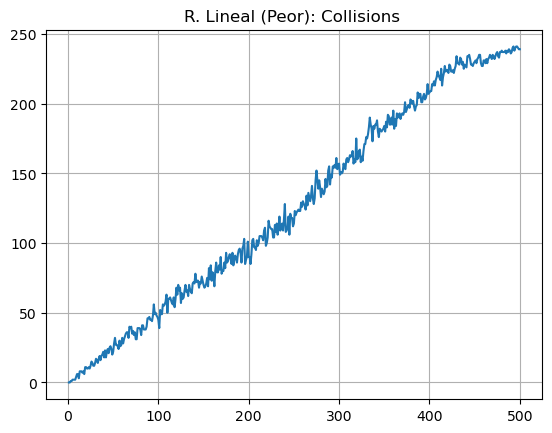

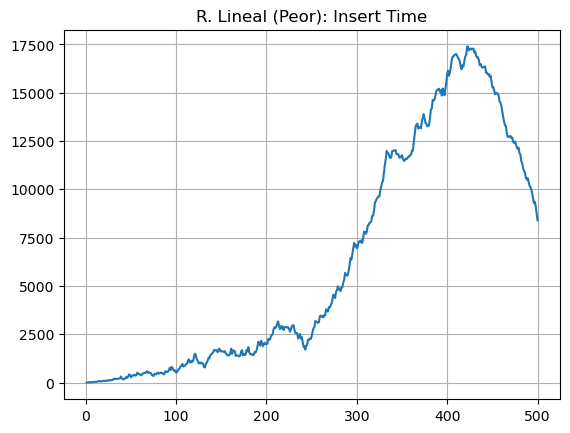

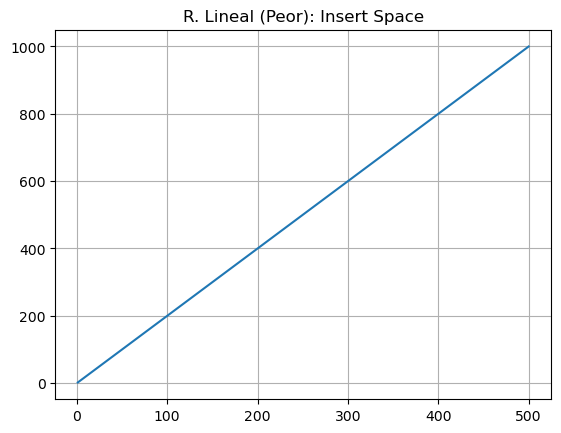

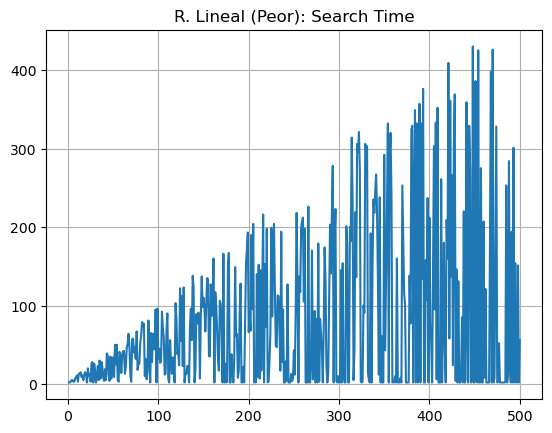

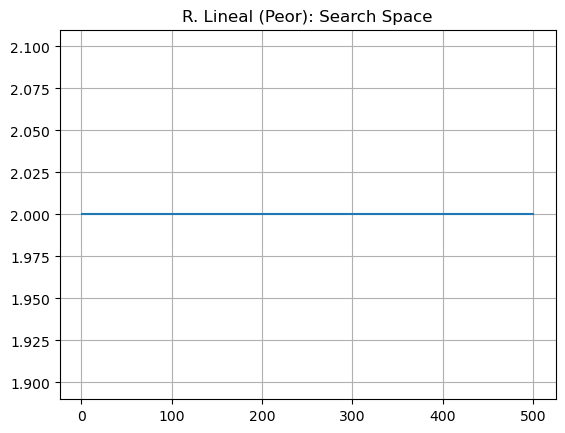

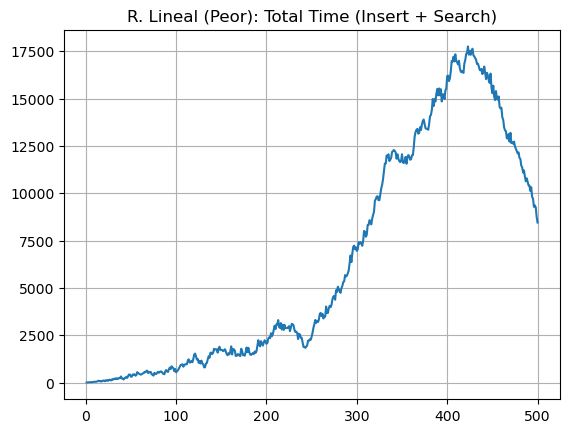

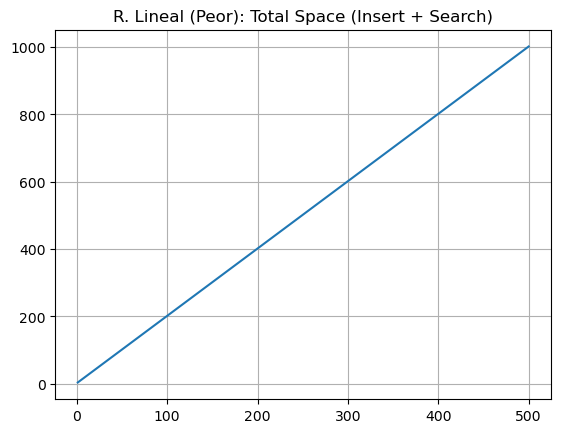

In [18]:
MAX = 500
arr = new_arr("random", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_rea(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_prom = y_collisions
y_time_in_prom = y_time_insert
y_space_in_prom = y_space_insert
y_time_se_prom = y_time_search
y_space_se_prom = y_space_search
y_time_prom = y_time
y_space_prom = y_space

### **Comparativas (Función Hash c/Reasignación Lineal)**

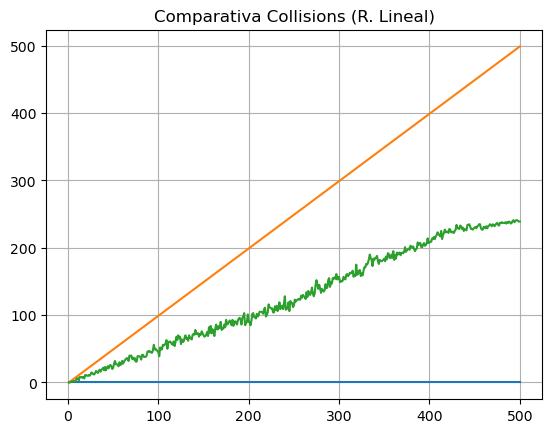

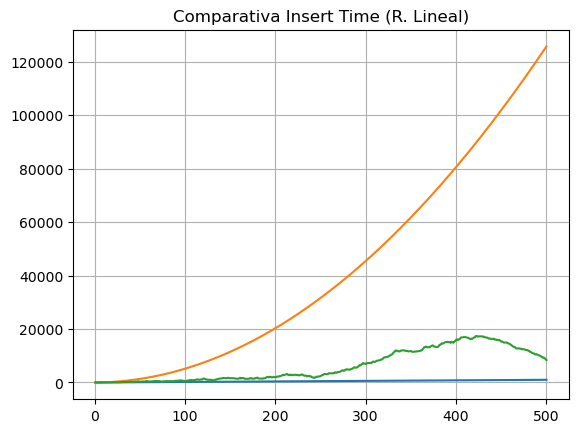

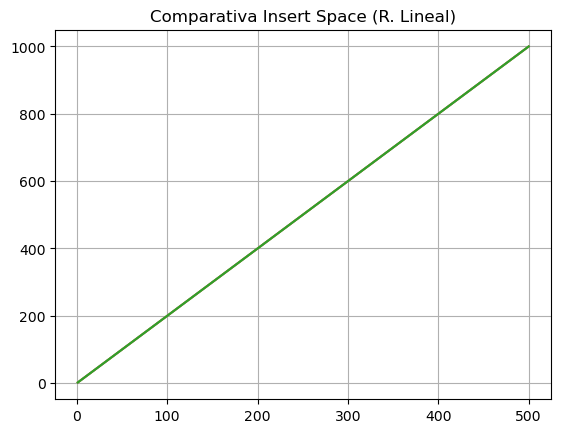

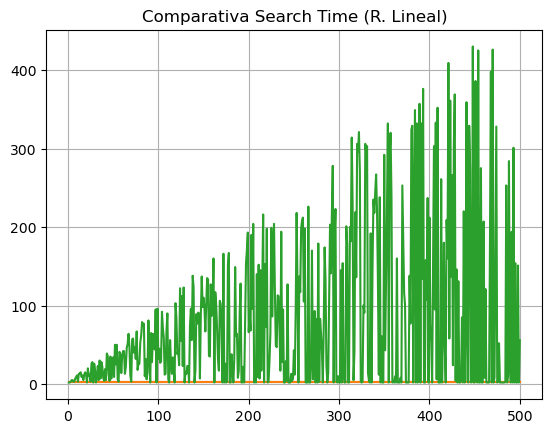

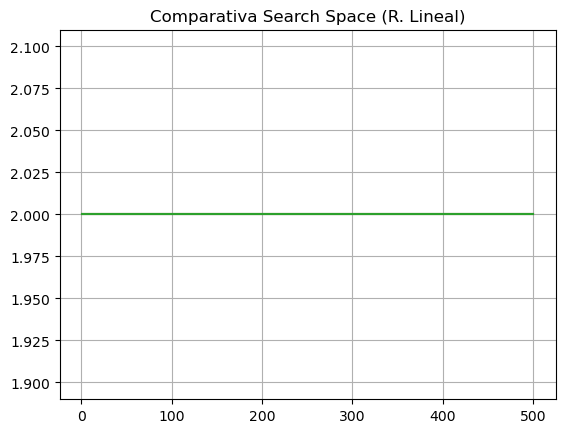

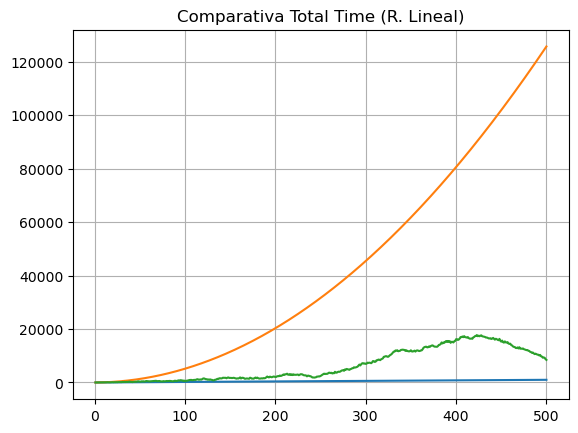

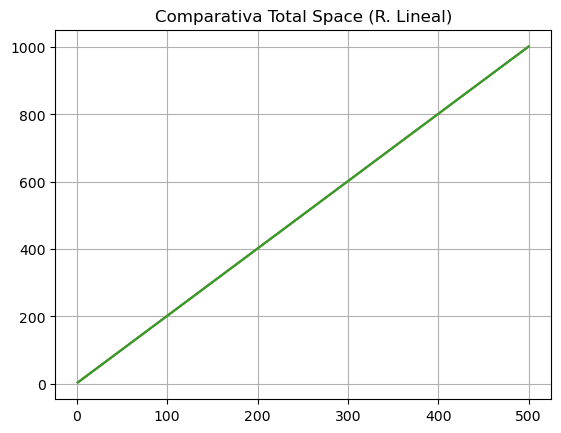

In [19]:
casos = [   {"titulo": "Comparativa Collisions (R. Lineal)", 
            "datos": [y_coll_mejor, y_coll_peor, y_coll_prom]},
            {"titulo": "Comparativa Insert Time (R. Lineal)", 
            "datos": [y_time_in_mejor, y_time_in_peor, y_time_in_prom]},
            {"titulo": "Comparativa Insert Space (R. Lineal)", 
            "datos": [y_space_in_mejor, y_space_in_peor, y_space_in_prom]},
            {"titulo": "Comparativa Search Time (R. Lineal)", 
            "datos": [y_time_se_mejor, y_time_se_peor, y_time_se_prom]},
            {"titulo": "Comparativa Search Space (R. Lineal)", 
            "datos": [y_space_se_mejor, y_space_se_peor, y_space_se_prom]},
            {"titulo": "Comparativa Total Time (R. Lineal)", 
            "datos": [y_time_mejor, y_time_peor, y_time_prom]},
            {"titulo": "Comparativa Total Space (R. Lineal)", 
            "datos": [y_space_mejor, y_space_peor, y_space_prom]},]

for caso in casos:
    plt.title(caso["titulo"])
    for values in caso["datos"]:
        plt.plot(x, values)
    plt.grid(True)
    plt.show()

### **Arreglos Anidados**

In [25]:
def insert_arr(table, node):
    collisions = 0
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(node.value, len(table))
    time += time_hash
    space += space_hash
    time += 1
    space += 1
    if len(table[i]) > 0:
        collisions = 1
    table[i].append(node)
    return collisions, time, space

def search_arr(table, string):
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(string, len(table))
    time += time_hash
    space += space_hash
    space += 1
    nodes_list = table[i]
    i = 0
    while i < len(nodes_list):
        time += 1
        node = nodes_list[i]
        if node.value == string:
            return node, time, space
        i += 1
    return None, time, space

#### **Prueba Arreglos Anidados**

In [28]:
MAX = 10
table = [[] for _ in range(MAX)] 
arr = new_arr("string", len(table), 0) # tipo de arreglo, tamaño, inicio

i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_arr(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1
    
key = "100" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_arr(table, key)
if result is not None: print("El valor", key, "se encontro en el", result.name)
else: print("El valor", key, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor 100 no se encontro
Hubo 5 colisiones


### **Mejor Caso (Función Hash c/Arreglos Anidados)**

In [29]:
MAX = 500
arr = new_arr("ordened", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_arr(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_arr(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "Arr. Anidados (Mejor): Collisions ", "datos_y": y_collisions},
            {"titulo": "Arr. Anidados (Mejor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "Arr. Anidados (Mejor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "Arr. Anidados (Mejor): Search Time", "datos_y": y_time_search},
            {"titulo": "Arr. Anidados (Mejor): Search Space", "datos_y": y_space_search},
            {"titulo": "Arr. Anidados (Mejor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "Arr. Anidados (Mejor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()
    
y_coll_mejor = y_collisions
y_time_in_mejor = y_time_insert
y_space_in_mejor = y_space_insert
y_time_se_mejor = y_time_search
y_space_se_mejor = y_space_search
y_time_mejor = y_time
y_space_mejor = y_space

TypeError: object of type 'NoneType' has no len()

### **Peor Caso (Función Hash c/Arreglos Anidados)**

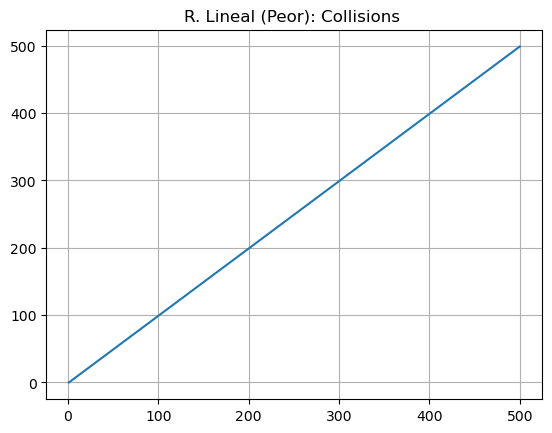

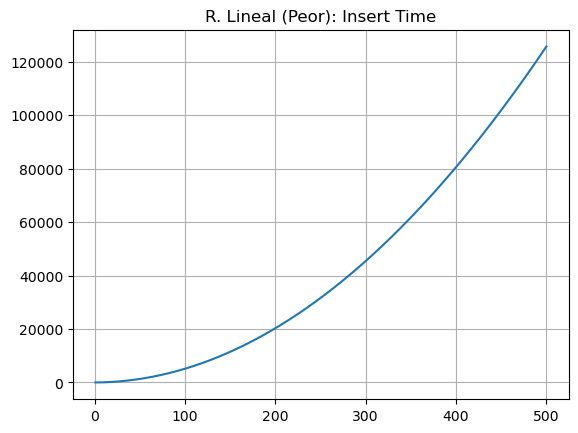

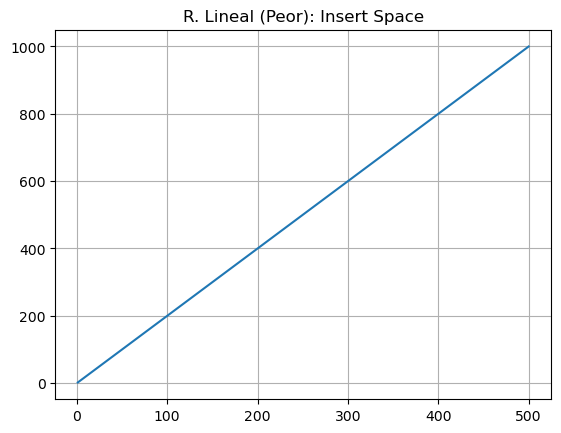

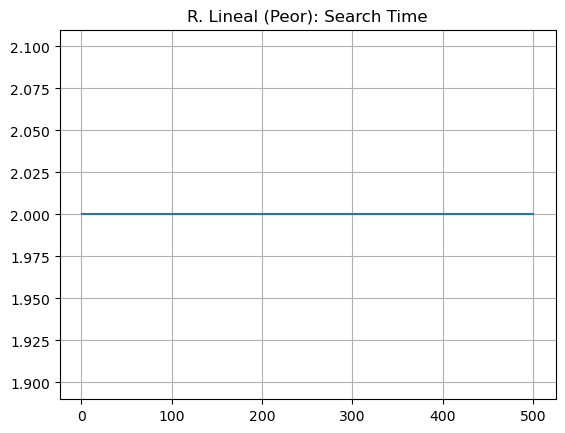

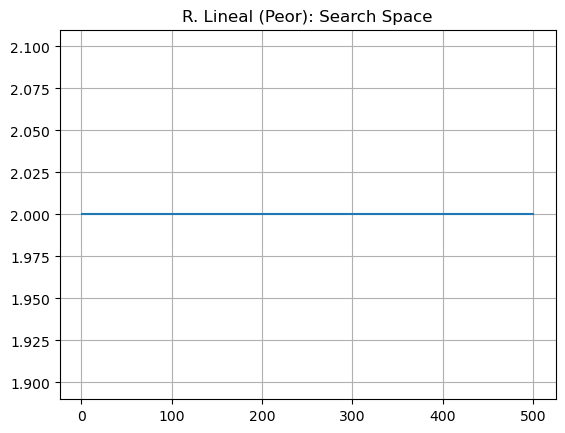

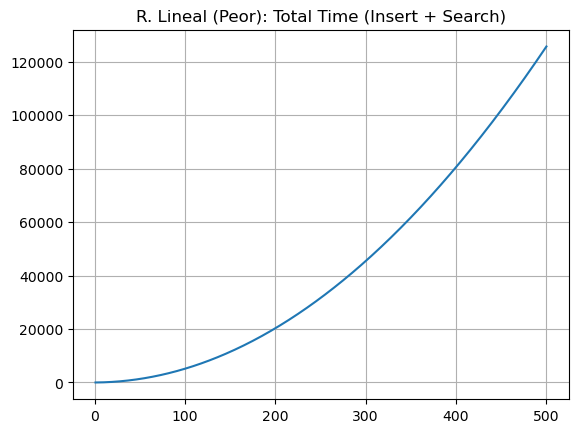

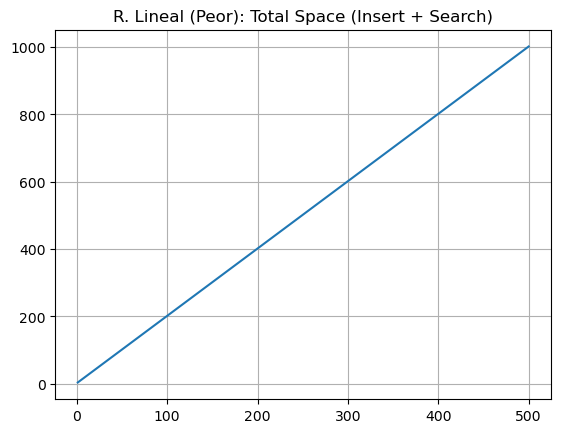

In [ ]:
MAX = 500
arr = new_arr("only", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_arr(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_arr(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "Arr. Anidados (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "Arr. Anidados (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "Arr. Anidados (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "Arr. Anidados (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "Arr. Anidados (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "Arr. Anidados (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "Arr. Anidados (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_peor = y_collisions
y_time_in_peor = y_time_insert
y_space_in_peor = y_space_insert
y_time_se_peor = y_time_search
y_space_se_peor = y_space_search
y_time_peor = y_time
y_space_peor = y_space

### **Caso Promedio (Función Hash c/Arreglos Anidados)**

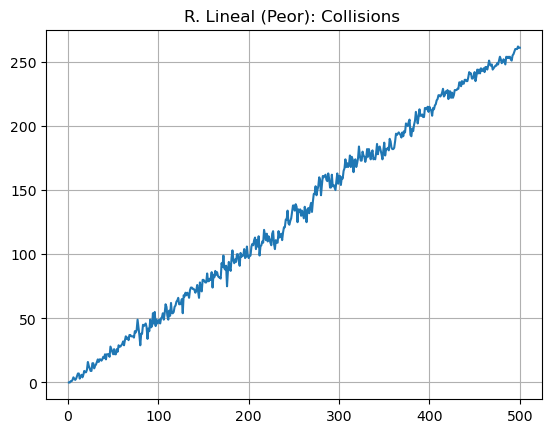

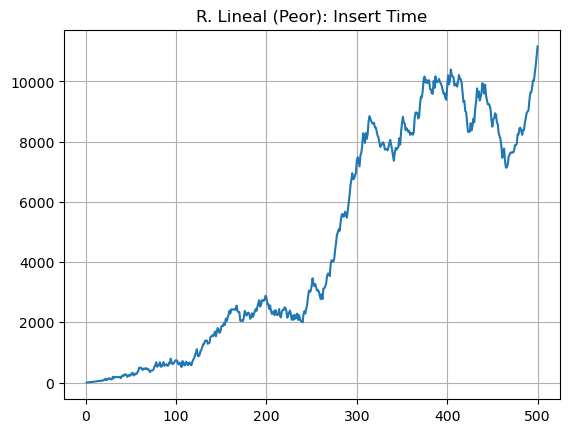

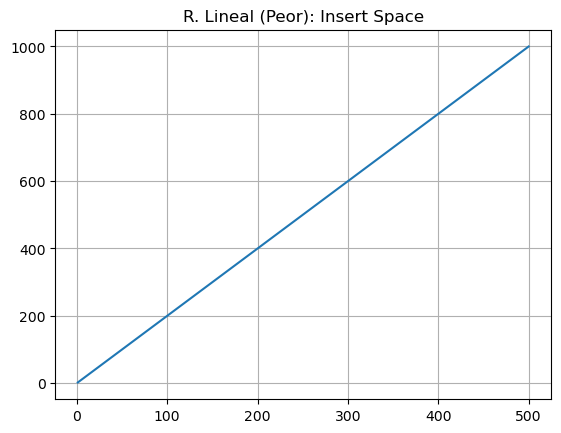

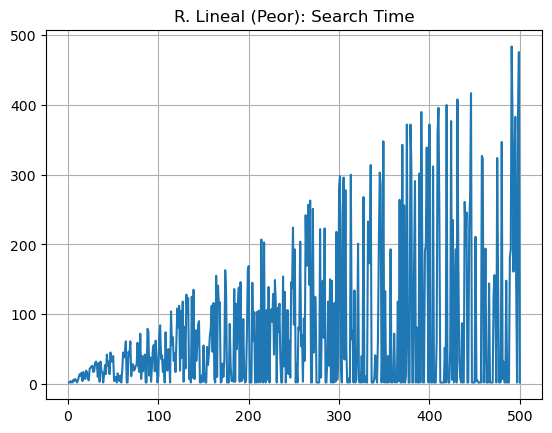

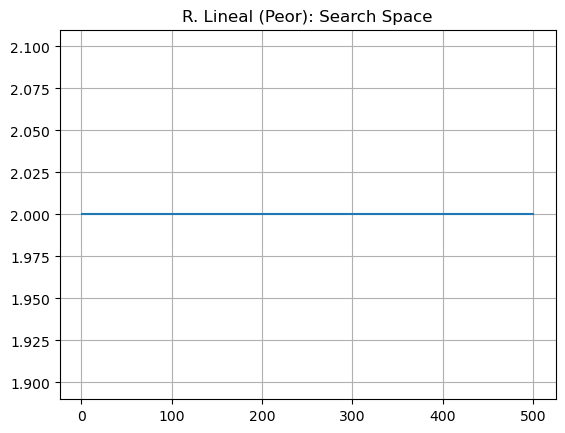

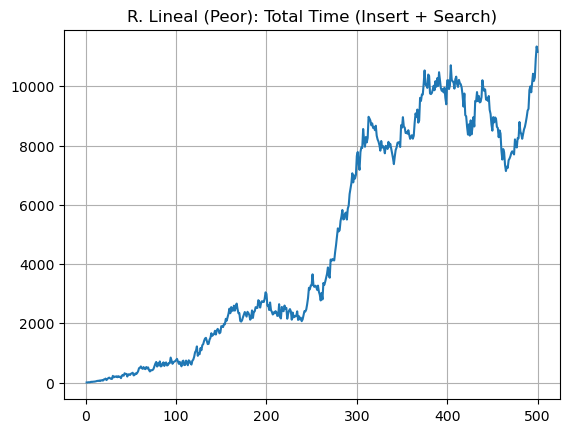

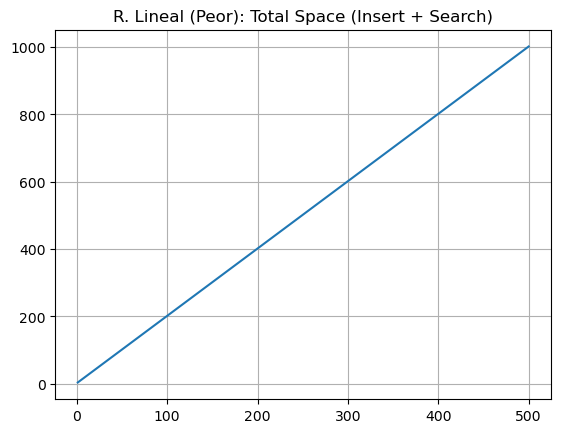

In [ ]:
MAX = 500
arr = new_arr("random", MAX, 0) # tipo de arreglo, tamaño, inicio
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_arr(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    key = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_arr(table, key)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "Arr. Anidados (Peor): Collisions ", "datos_y": y_collisions},
            {"titulo": "Arr. Anidados (Peor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "Arr. Anidados (Peor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "Arr. Anidados (Peor): Search Time", "datos_y": y_time_search},
            {"titulo": "Arr. Anidados (Peor): Search Space", "datos_y": y_space_search},
            {"titulo": "Arr. Anidados (Peor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "Arr. Anidados (Peor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

y_coll_prom = y_collisions
y_time_in_prom = y_time_insert
y_space_in_prom = y_space_insert
y_time_se_prom = y_time_search
y_space_se_prom = y_space_search
y_time_prom = y_time
y_space_prom = y_space

### **Comparativas (Función Hash c/Reasignación Lineal)**

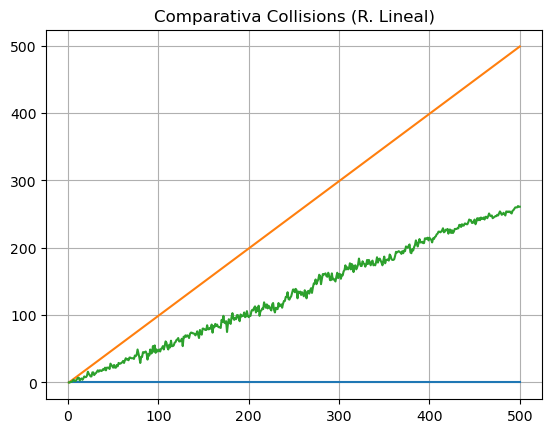

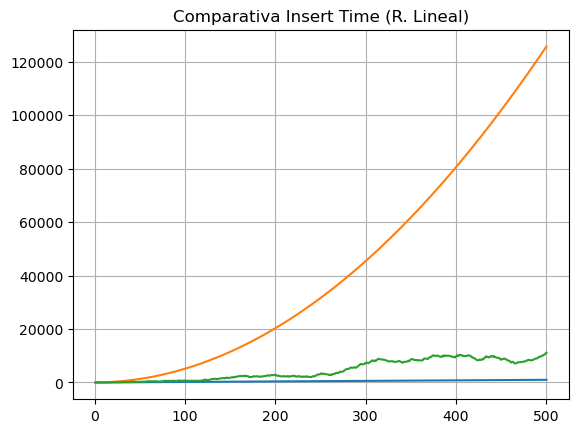

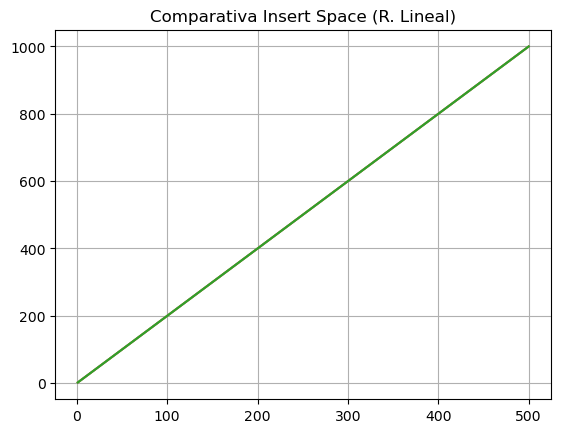

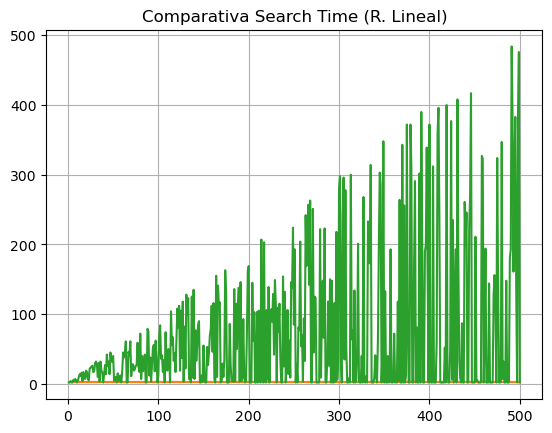

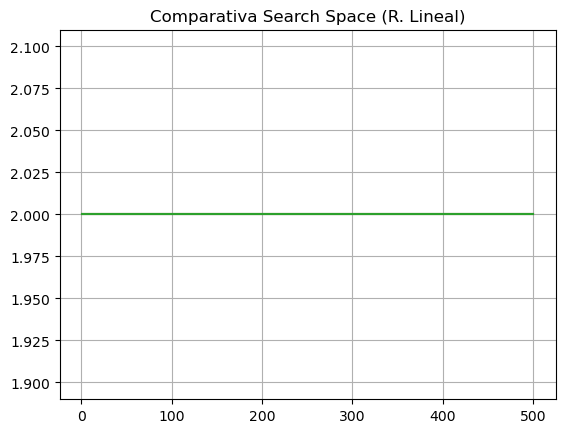

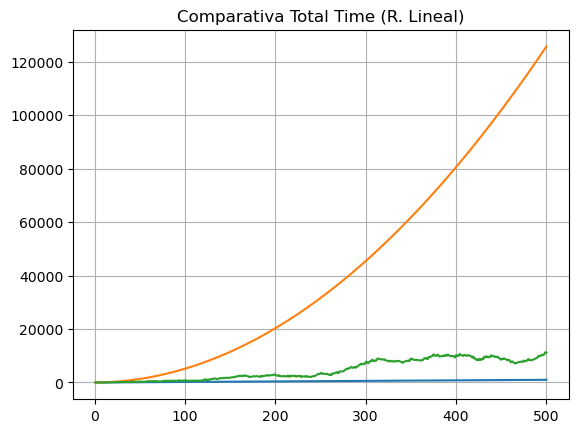

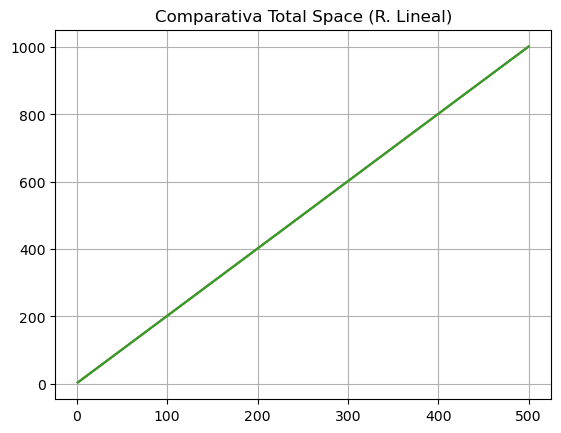

In [ ]:
casos = [   {"titulo": "Comparativa Collisions (Arreglos Anidades)", 
            "datos": [y_coll_mejor, y_coll_peor, y_coll_prom]},
            {"titulo": "Comparativa Insert Time (Arreglos Anidades)", 
            "datos": [y_time_in_mejor, y_time_in_peor, y_time_in_prom]},
            {"titulo": "Comparativa Insert Space (Arreglos Anidades)", 
            "datos": [y_space_in_mejor, y_space_in_peor, y_space_in_prom]},
            {"titulo": "Comparativa Search Time (Arreglos Anidades)", 
            "datos": [y_time_se_mejor, y_time_se_peor, y_time_se_prom]},
            {"titulo": "Comparativa Search Space (Arreglos Anidades)", 
            "datos": [y_space_se_mejor, y_space_se_peor, y_space_se_prom]},
            {"titulo": "Comparativa Total Time (Arreglos Anidades)", 
            "datos": [y_time_mejor, y_time_peor, y_time_prom]},
            {"titulo": "Comparativa Total Space (Arreglos Anidades)", 
            "datos": [y_space_mejor, y_space_peor, y_space_prom]},]

for caso in casos:
    plt.title(caso["titulo"])
    for values in caso["datos"]:
        plt.plot(x, values)
    plt.grid(True)
    plt.show()

### **Encadenamiento**

In [ ]:
def insert_en(table, node):
    collisions = 0
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(node.value, len(table))
    time += time_hash
    space += space_hash
    time += 1
    space += 1
    if table[i] is not None:
        collisions = 1
    node.next = table[i]
    table[i] = node
    return collisions, time, space

def search_en(table, string):
    time = 0
    space = 0
    i, time_hash, space_hash = hashMod(string, len(table))
    time += time_hash
    space += space_hash
    space += 1
    current = table[i]
    while current is not None:
        time += 1
        if current.value == string:
            return current, time, space
        current = current.next
    return None, time, space

#### **Prueba Encadenamiento**

In [ ]:
MAX = 10
table = [None] * MAX
arr = new_arr("string", MAX, 0) # tipo de arreglo, tamaño, inicio

i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_en(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1

key = "alejandro" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_en(table, key)
if result is not None: print("El valor", key, "se encontro en el", result.name)
else: print("El valor", key, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor alejandro no se encontro
Hubo 5 colisiones
